# Line Chart of Semantic SHAP Values

This notebook visualizes the values in the `semantic_shap` field for each observation in the JSON file as a line chart.

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
with open('Pyramid_semantic_shap_sorted.json', 'r') as f:
    data = json.load(f)

In [3]:
# Extract 'semantic_shap' for each observation
semantic_shap_list = []
for entry in data:
    if 'semantic_shap' in entry and entry['semantic_shap']:
        semantic_shap_list.append(entry['semantic_shap'])

# Convert to DataFrame
df = pd.DataFrame(semantic_shap_list)
df.head()

,Block Detected,Wall Detected,Goal Detected,SwitchOff Detected,SwitchOn Detected,Stone Detected,Misses,Proximity,SwitchState,Velocity
0,0.002873,0.011215,0.000499,0.000753,0.000278,0.001450,0.003844,0.008835,0.007237,0.135363
1,0.003131,0.010782,0.000280,0.000918,0.000100,0.001677,0.002029,0.003711,0.002186,0.037861
2,0.003651,0.011363,0.000240,0.000945,0.000100,0.001776,0.001649,0.003340,0.002088,0.010920
3,0.003764,0.011477,0.000239,0.000975,0.000096,0.001773,0.001338,0.002872,0.002456,0.015081
4,0.003738,0.011476,0.000235,0.000973,0.000096,0.001768,0.001195,0.002811,0.002729,0.017391


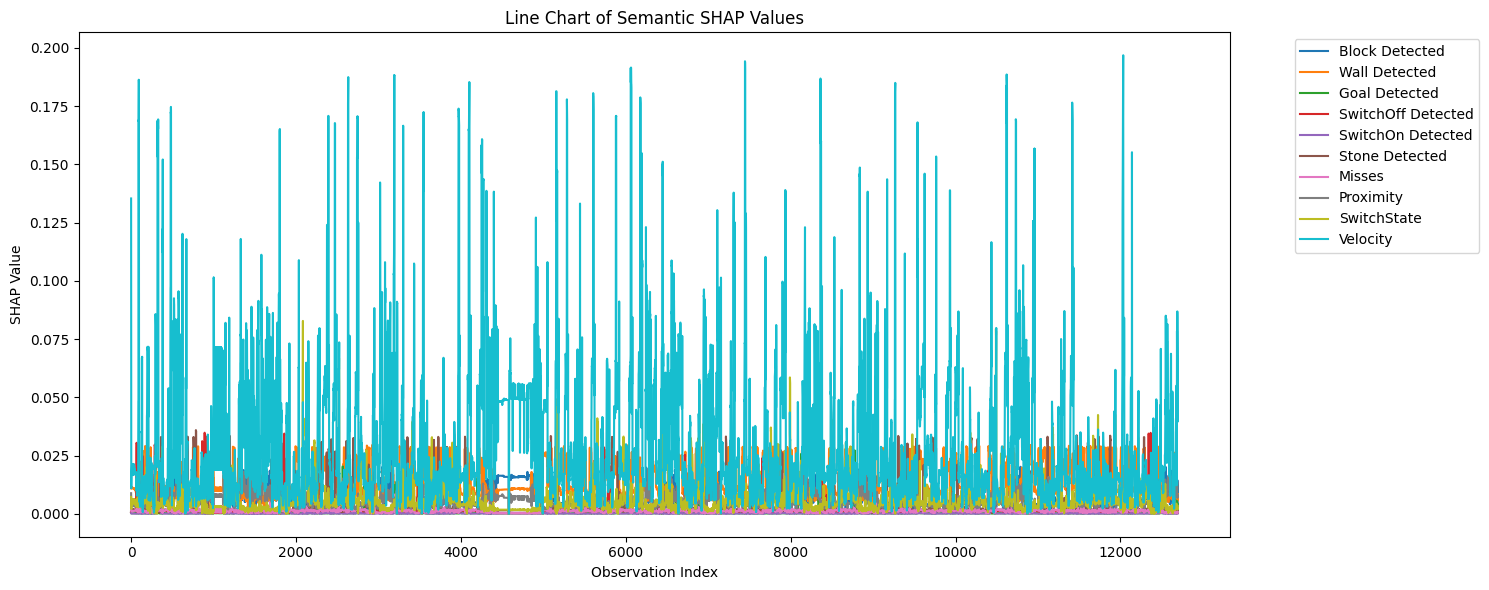

In [4]:
# Plot line chart for each semantic_shap key
plt.figure(figsize=(15, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.xlabel('Observation Index')
plt.ylabel('SHAP Value')
plt.title('Line Chart of Semantic SHAP Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
# Plot separate charts for specified index ranges
ranges = [
    (0, 659),
    (659, 1796),
    (1796, 3223),
    (3223, 4991),
    (4991, 6638),
    (6638, 7154),
    (7154, 8360),
    (8360, 9050),
    (9050, 10871)
]

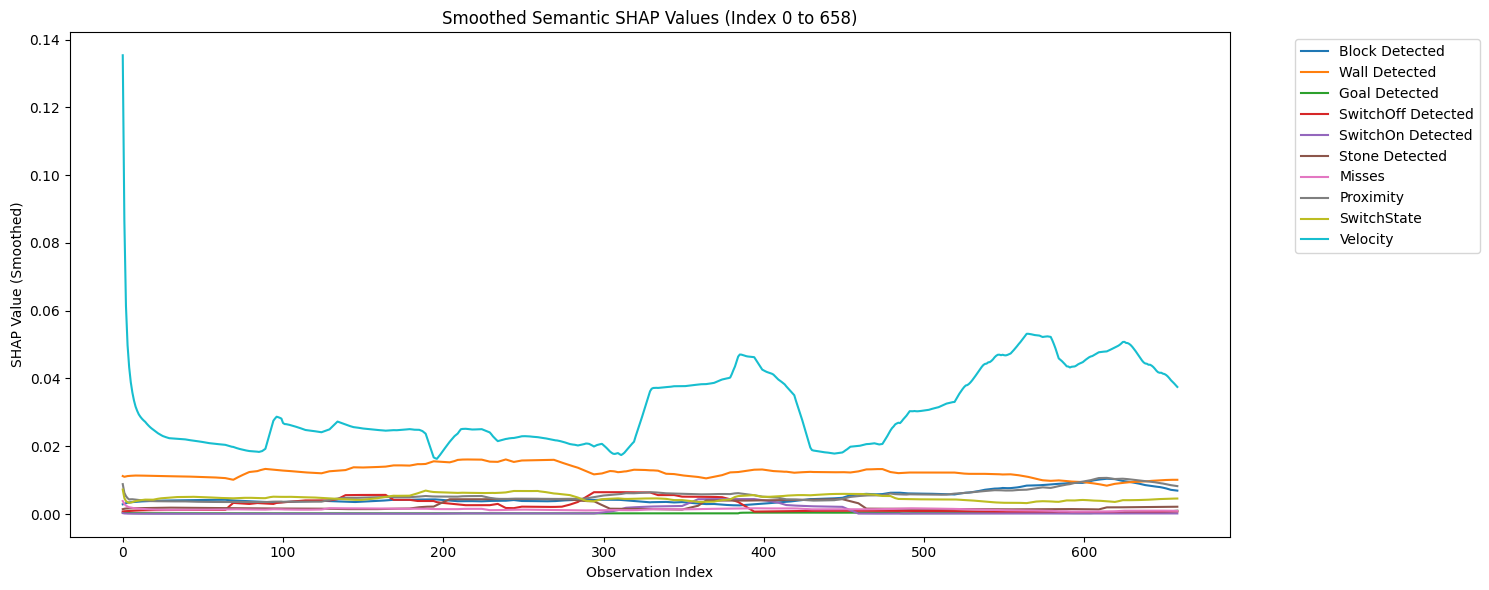

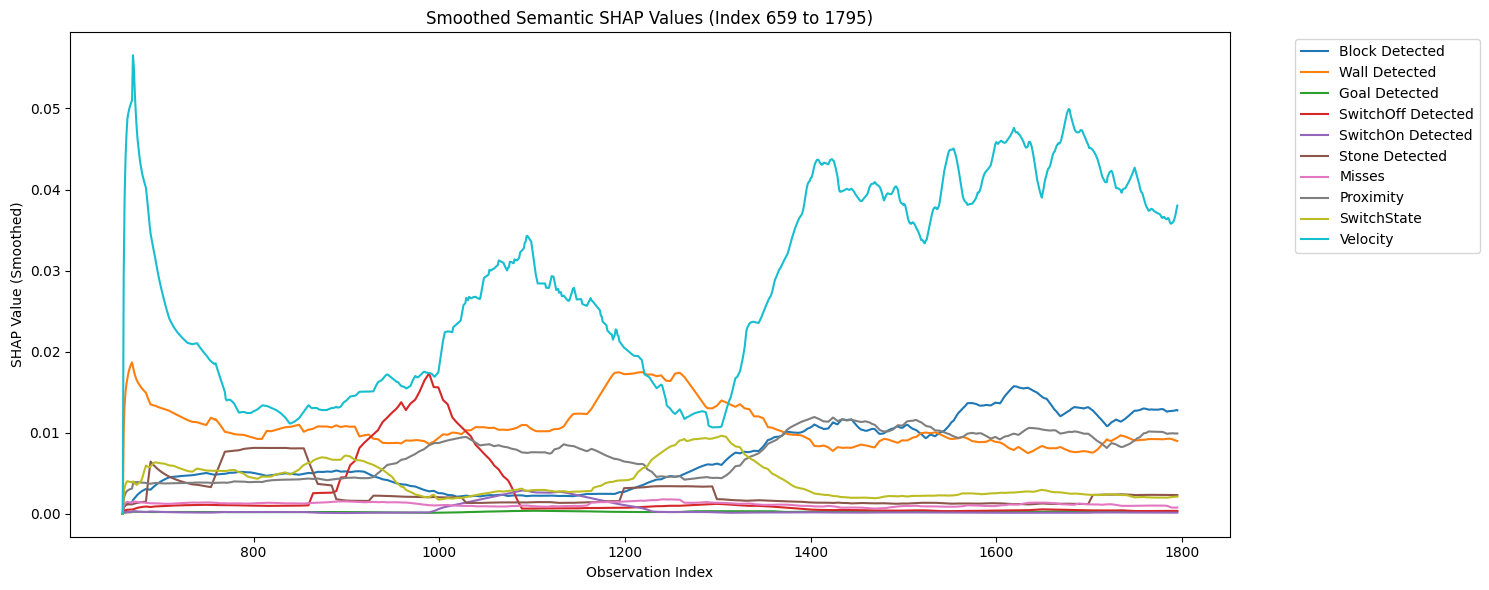

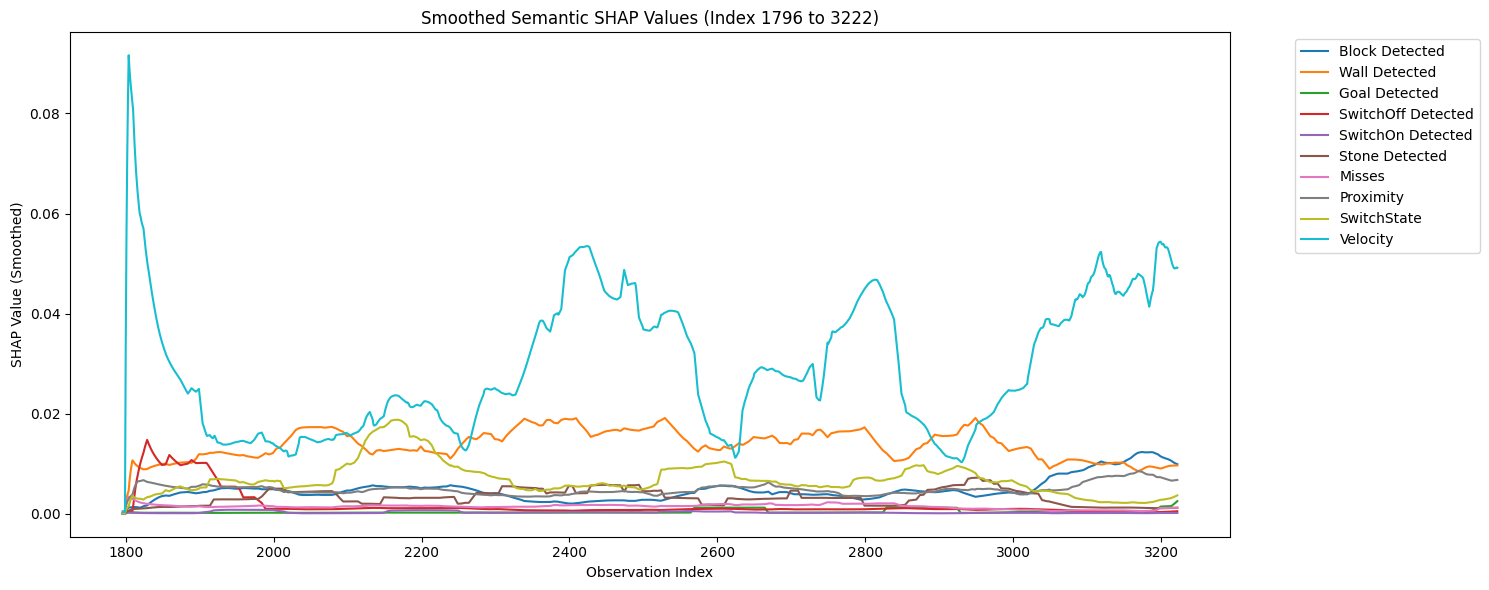

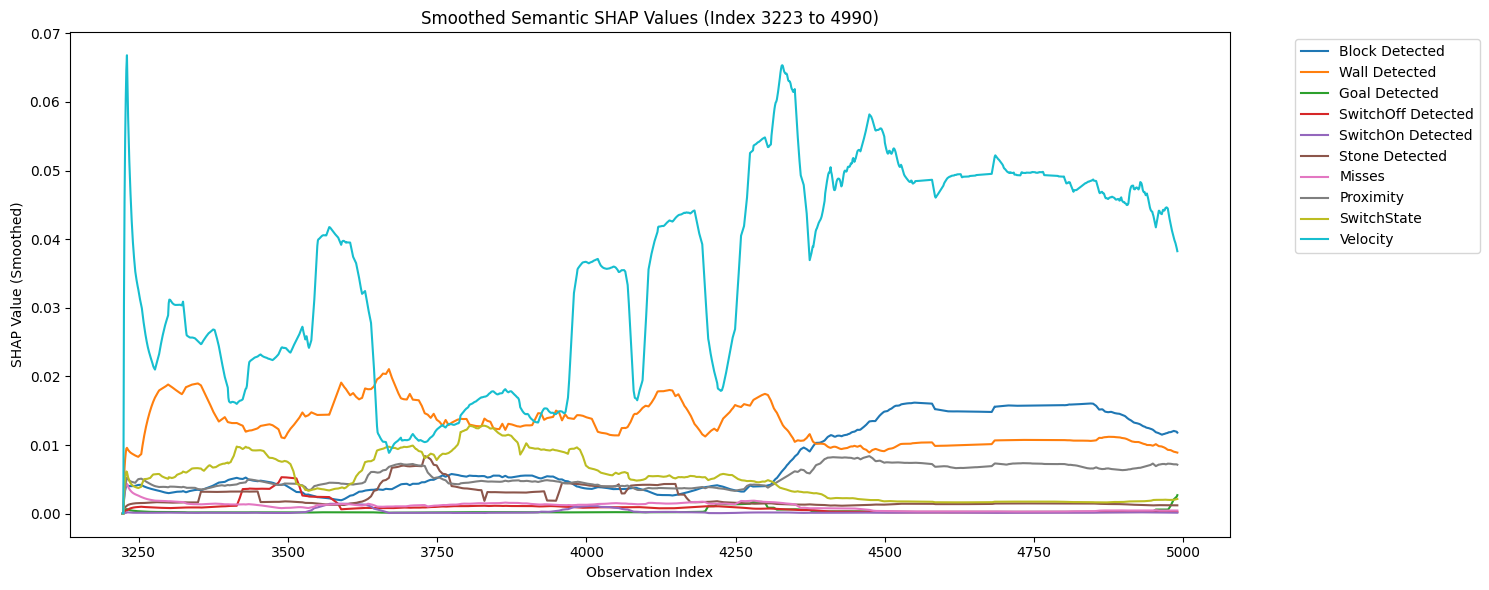

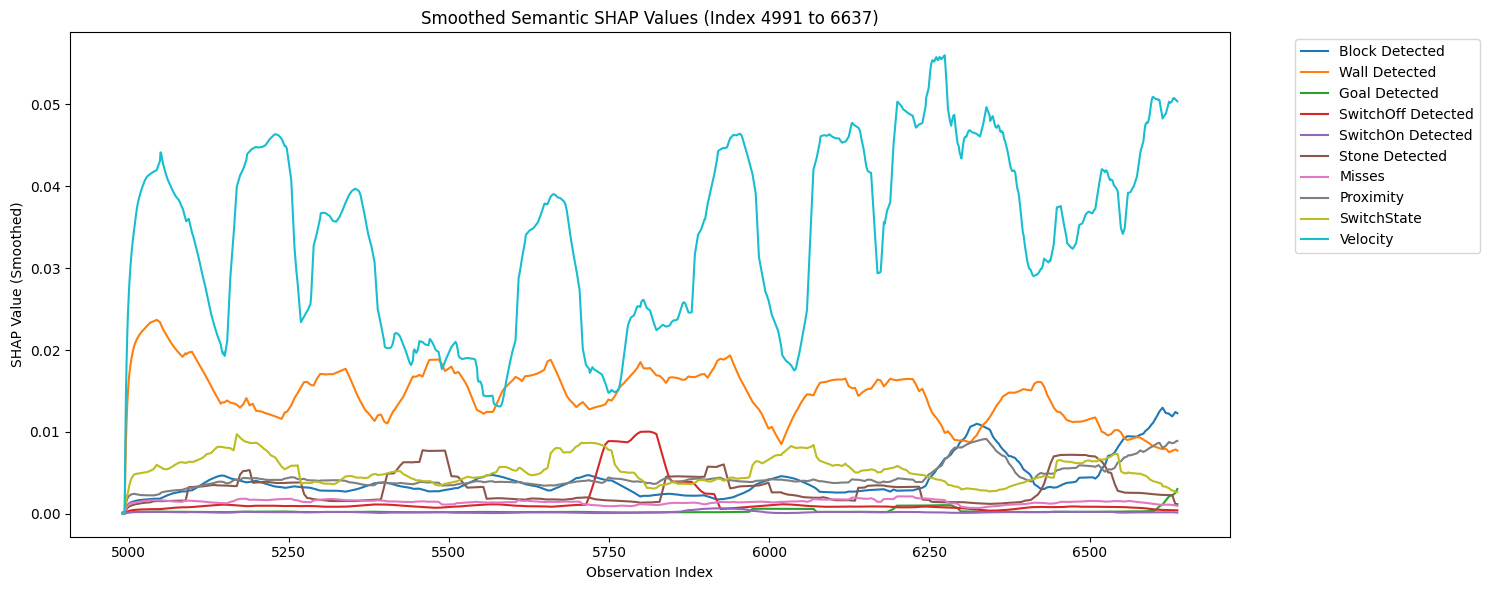

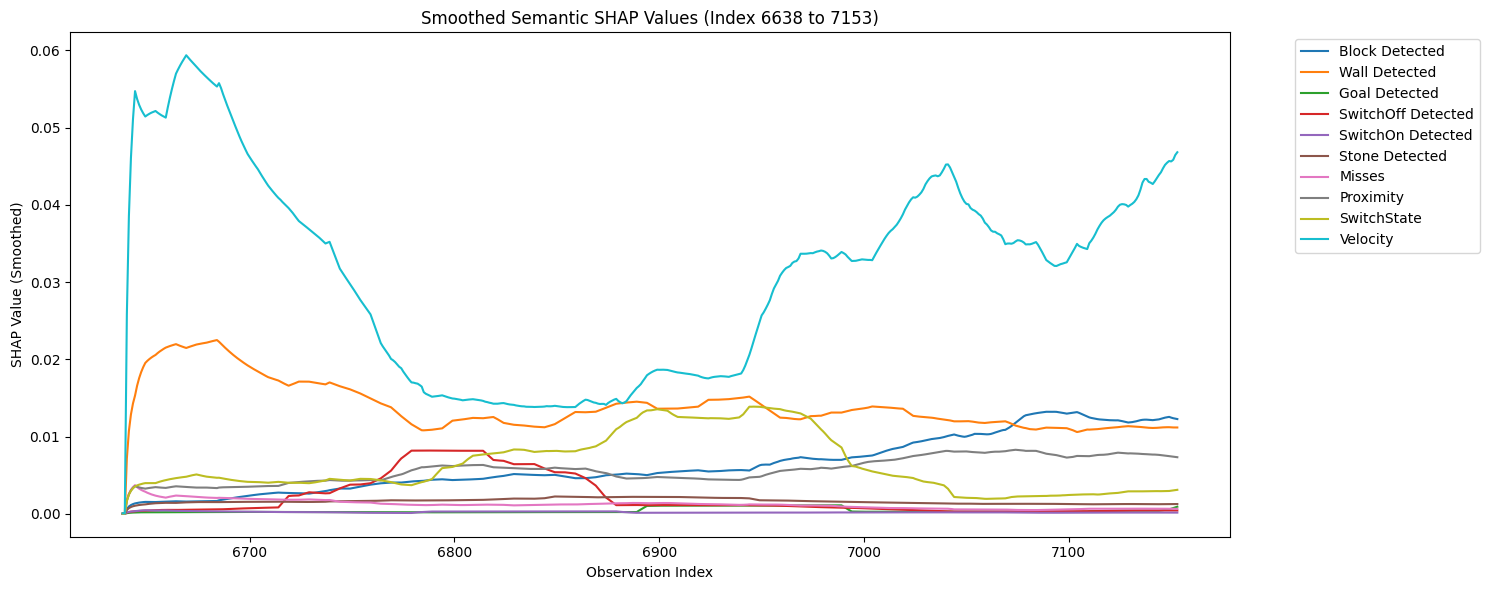

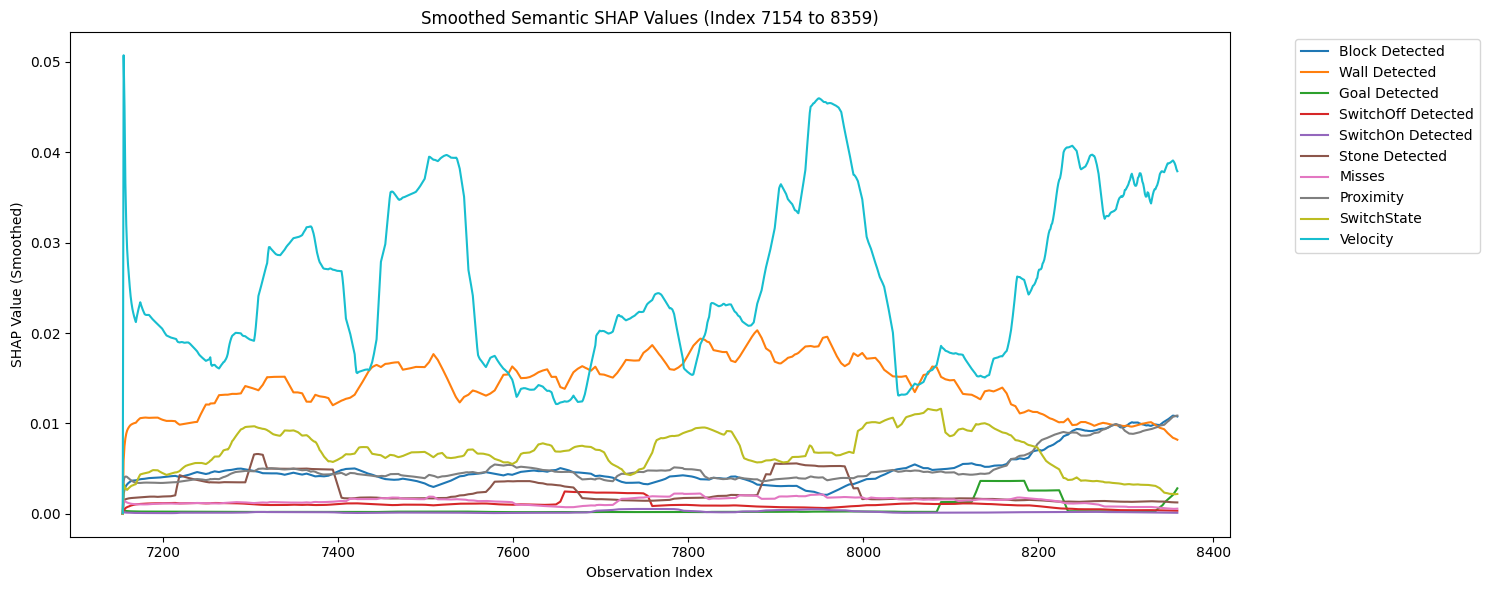

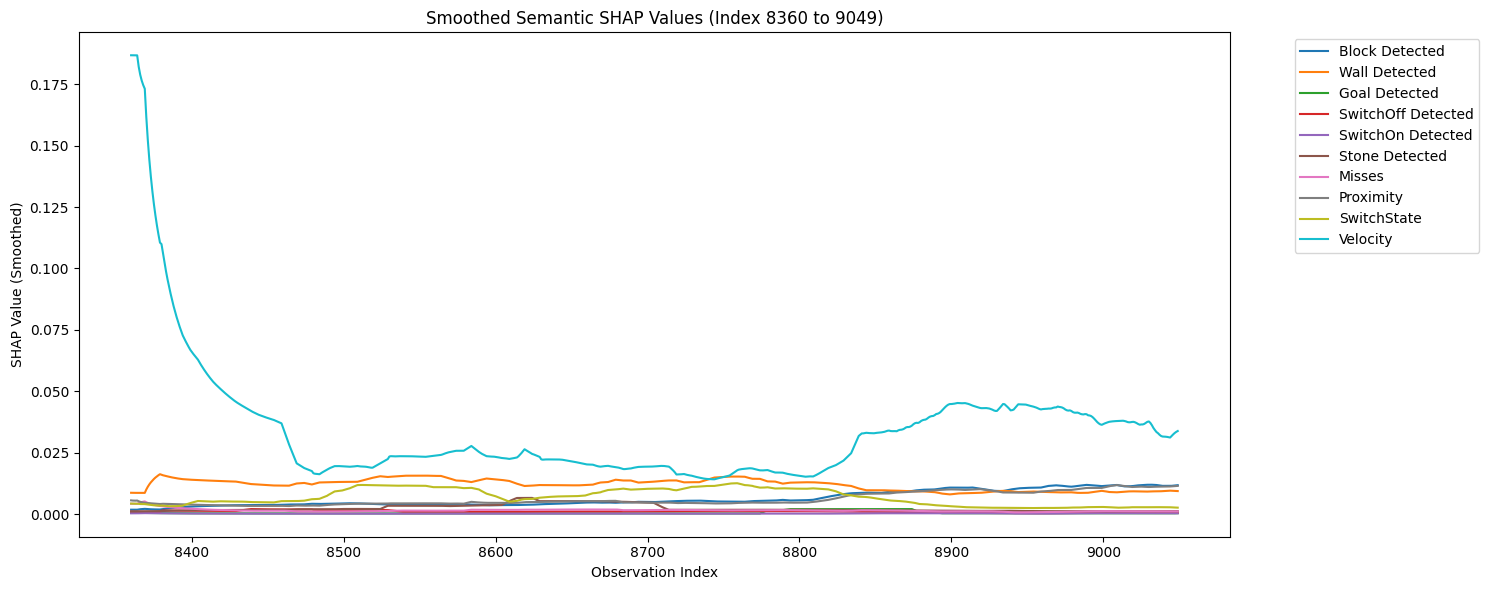

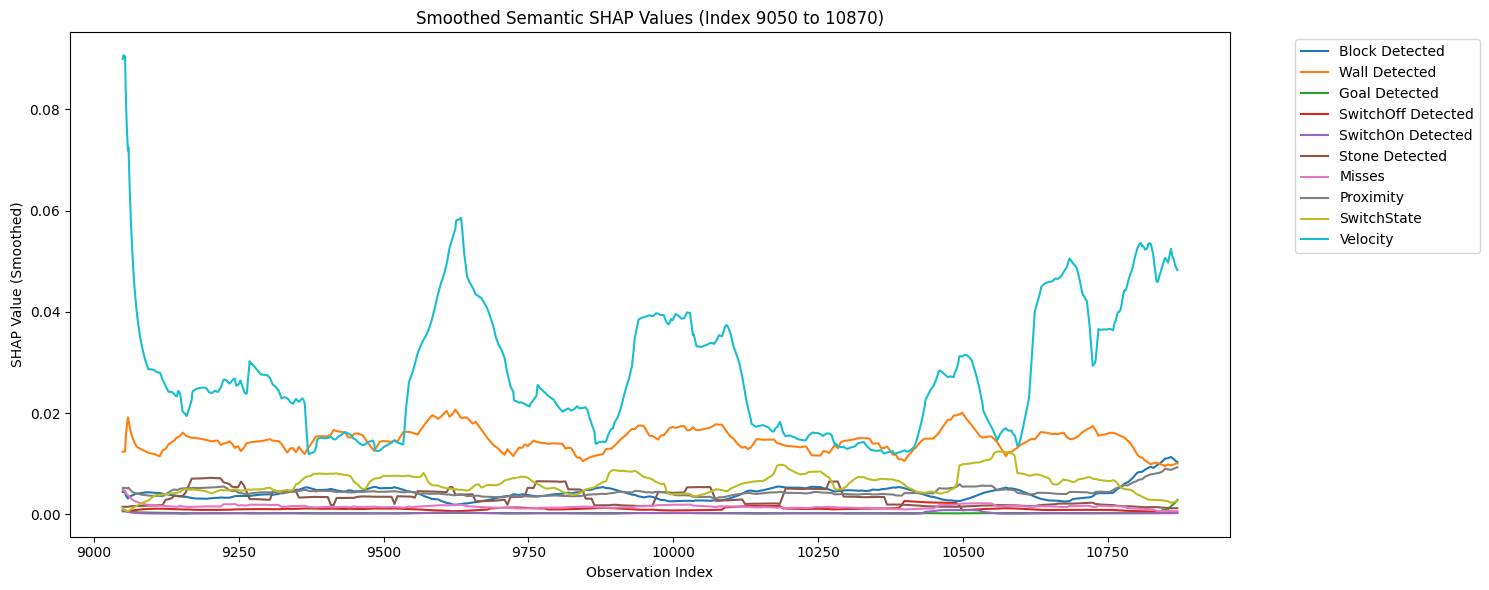

In [13]:
# Plot smoothed (rolling average) charts for each range to reduce jaggedness
window = 100  # Adjust window size for more/less smoothing

for i, (start, end) in enumerate(ranges):
    plt.figure(figsize=(15, 6))
    df_range = df.iloc[start:end].rolling(window, min_periods=1).mean()
    for col in df.columns:
        plt.plot(df_range.index, df_range[col], label=col)
    plt.xlabel('Observation Index')
    plt.ylabel('SHAP Value (Smoothed)')
    plt.title(f'Smoothed Semantic SHAP Values (Index {start} to {end-1})')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

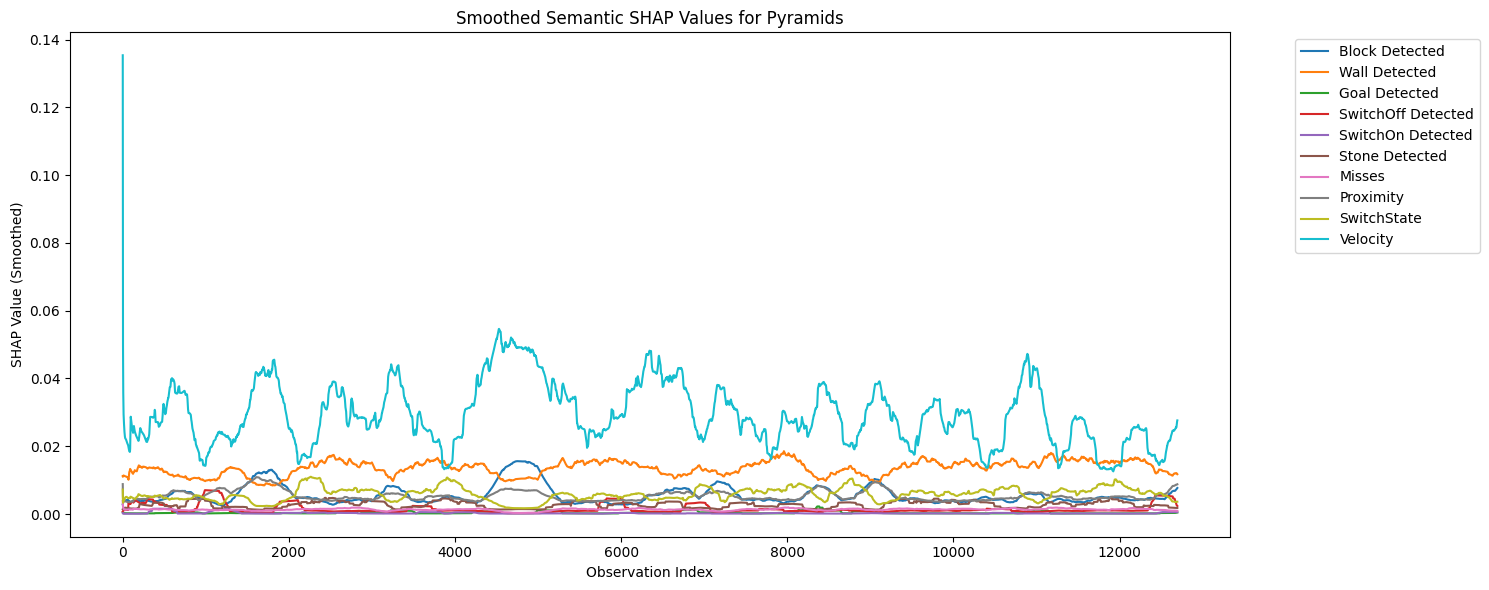

In [21]:
window = 300  # Adjust window size for more/less smoothing

plt.figure(figsize=(15, 6))
df_range = df.rolling(window, min_periods=1).mean()
for col in df.columns:
    plt.plot(df_range.index, df_range[col], label=col)
plt.xlabel('Observation Index')
plt.ylabel('SHAP Value (Smoothed)')
plt.title(f'Smoothed Semantic SHAP Values for Pyramids')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
agent0 = '..\Dungeon\Dungeon_shap_agent0_sorted.json'
agent1 = '..\Dungeon\Dungeon_shap_agent1_sorted.json'
agent2 = '..\Dungeon\Dungeon_shap_agent2_sorted.json'

#open all three json files
with open(agent0, 'r') as f:
    agent0_data = json.load(f)
with open(agent1, 'r') as f:
    agent1_data = json.load(f)
with open(agent2, 'r') as f:
    agent2_data = json.load(f)

# Extract 'semantic_shap' for each observation in agents
# Extract 'semantic_shap' for each observation
semantic_shap_list0 = []
for entry in agent0_data:
    if 'semantic_shap' in entry and entry['semantic_shap']:
        semantic_shap_list0.append(entry['semantic_shap'])
semantic_shap_list1 = []
for entry in agent1_data:
    if 'semantic_shap' in entry and entry['semantic_shap']:
        semantic_shap_list1.append(entry['semantic_shap'])
semantic_shap_list2 = []
for entry in agent2_data:
    if 'semantic_shap' in entry and entry['semantic_shap']:
        semantic_shap_list2.append(entry['semantic_shap'])

# Convert to DataFrame
df0 = pd.DataFrame(semantic_shap_list0)
df1 = pd.DataFrame(semantic_shap_list1)
df2 = pd.DataFrame(semantic_shap_list2)
df0.head()
df1.head()
df2.head()

dfs = [df0, df1, df2]

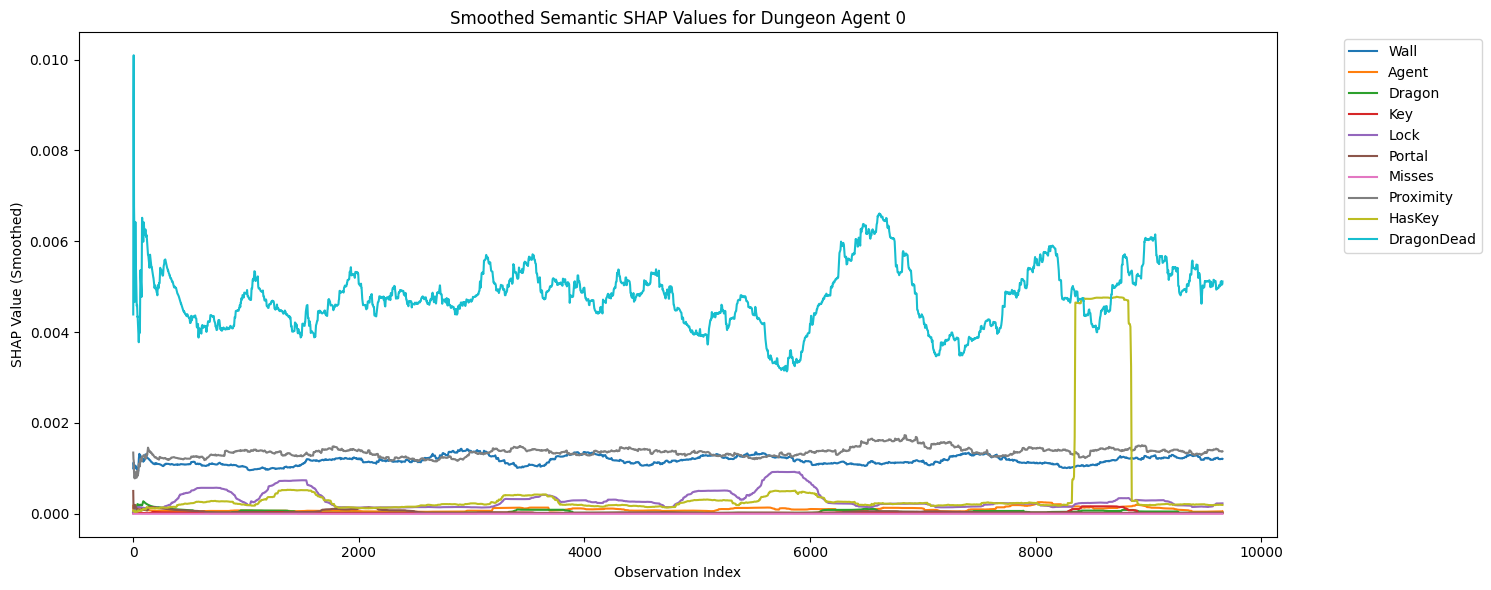

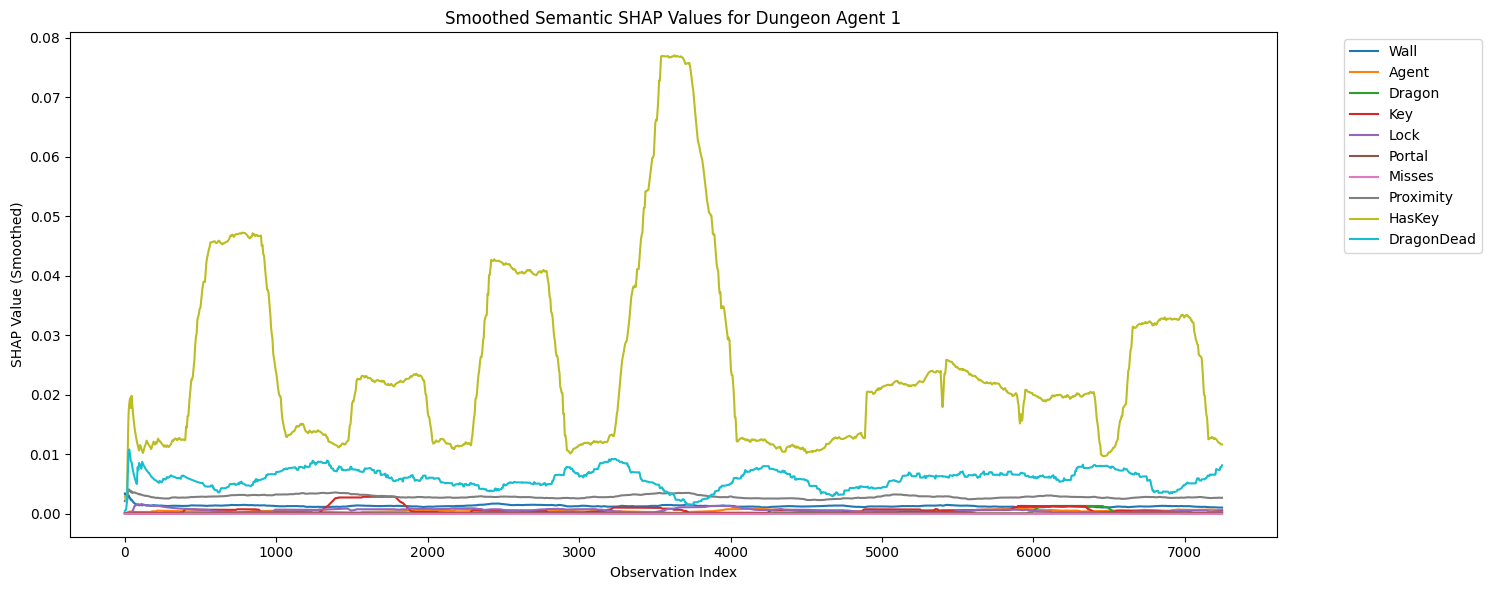

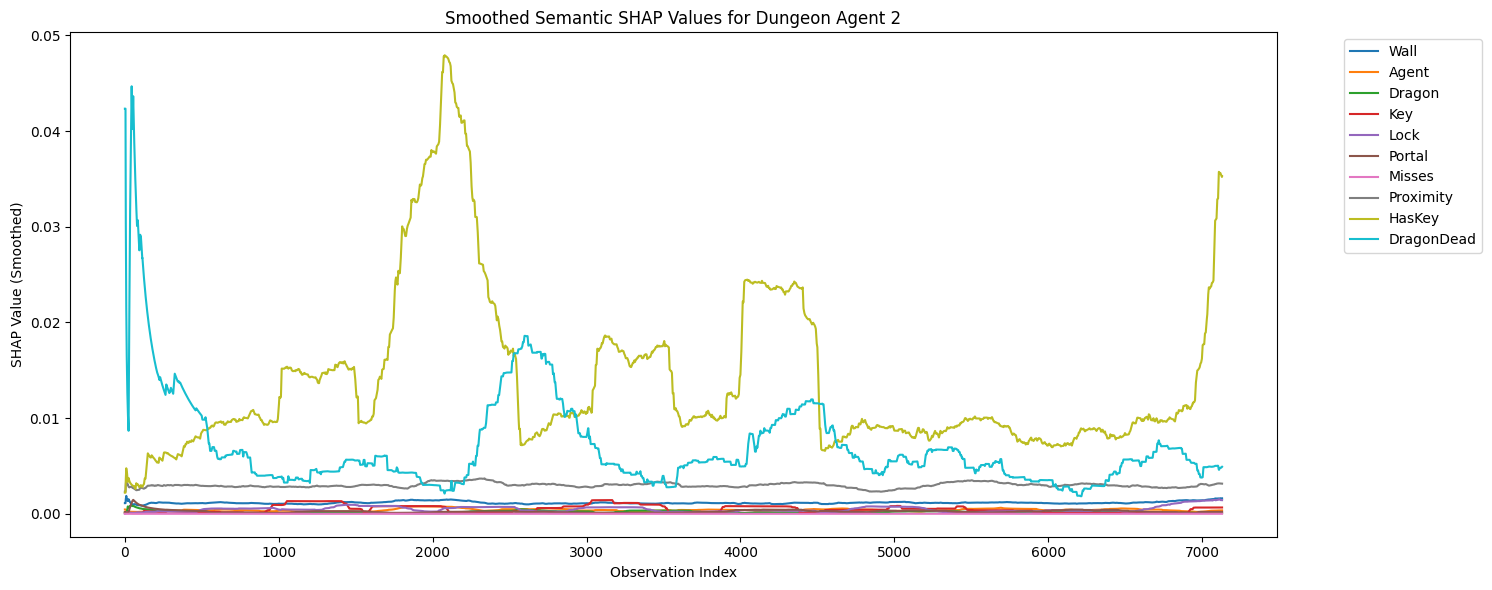

In [33]:
window = 500  # Adjust window size for more/less smoothing
for i, df in enumerate(dfs):

    plt.figure(figsize=(15, 6))
    df_range = df.rolling(window, min_periods=1).mean()
    for col in df.columns:
        plt.plot(df_range.index, df_range[col], label=col)
    plt.xlabel('Observation Index')
    plt.ylabel('SHAP Value (Smoothed)')
    plt.title(f'Smoothed Semantic SHAP Values for Dungeon Agent {i}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()